<a href="https://colab.research.google.com/github/PRsant90/ChallengeDatos/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [43]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=tienda)

https://docs.google.com/spreadsheets/d/1kBKWdoGCC86uiv2KQ2kFRY9p5VzvmZG-1tAraQB0hCA/edit#gid=0


# #1. Análisis de facturación



In [ ]:
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

In [ ]:
contador = 1
for url in urls:
  tienda = pd.read_csv(url)
  ingreso = tienda ['Precio'].sum()
  promedio = ingreso/len(tienda['Precio'])
  print(f'El ingreso total de la tienda{contador}:{ingreso} y el promedio de ventas es de {promedio}')
  contador += 1

El ingreso total de la tienda1:1150880400.0 y el promedio de ventas es de 487867.9101314116
El ingreso total de la tienda2:1116343500.0 y el promedio de ventas es de 473227.42687579483
El ingreso total de la tienda3:1098019600.0 y el promedio de ventas es de 465459.7710894447
El ingreso total de la tienda4:1038375700.0 y el promedio de ventas es de 440362.89228159457


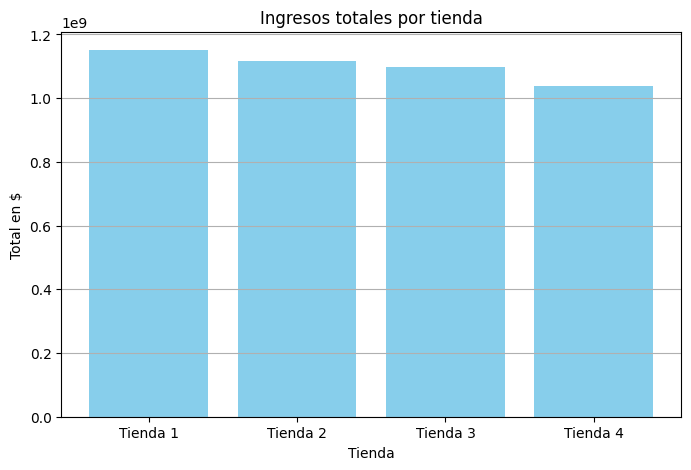

In [50]:
import matplotlib.pyplot as plt
ingresos = [tienda['Precio'].sum() for tienda in [pd.read_csv(url) for url in urls]]

plt.figure(figsize=(8,5))
plt.bar(nombres_tiendas, ingresos, color='skyblue')
plt.title('Ingresos totales por tienda')
plt.ylabel('Total en $')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.show()

#2. Ventas por categoría

In [ ]:
#Version 1#


contador = 1

for url in urls:
  tienda = pd.read_csv(url)
  ingreso_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum()
  print(ingreso_categoria)


  print(f'ingresos por categoria. De la tienda {contador}')
  print(ingreso_categoria)
  print()

contador += 1

Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64
ingresos por categoria. De la tienda 1
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes      

In [ ]:
#Version 2

def calcular_ingresos_cateogria(url):
  tienda = pd.read_csv(url)
  return tienda.groupby('Categoría del Producto')['Precio'].sum()




In [ ]:
 ingresos_por_tienda = [calcular_ingresos_cateogria(url) for url in urls]
 nombres_tiendas = [f'Tienda {i}' for i in range(1, len(urls)+ 1)]
 for nombre, ingreso in zip(nombres_tiendas, ingresos_por_tienda):
    print (f'Los ingresos de la tienda para {nombre}')
    print(ingreso)
    print()

Los ingresos de la tienda para Tienda 1
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Los ingresos de la tienda para Tienda 2
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Los ingresos de la tienda para Tienda 3
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónic

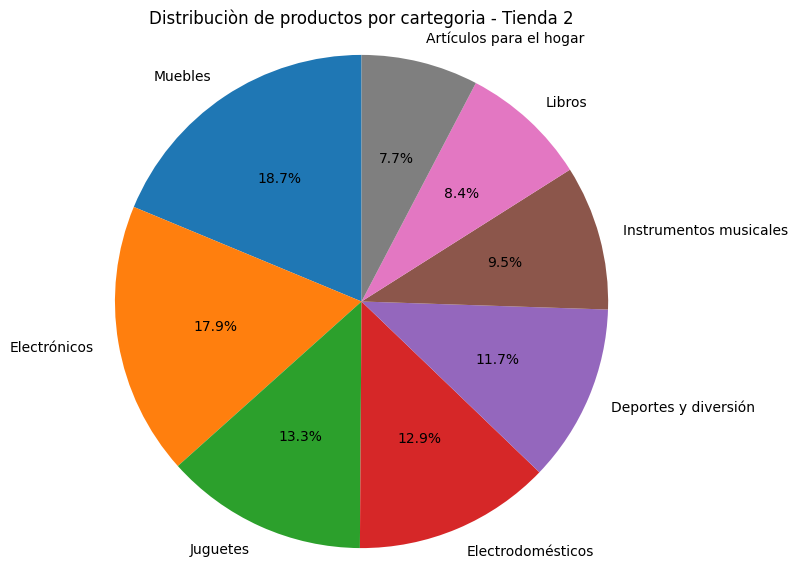

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

tienda1  = pd.read_csv(urls[0])
categorias = tienda2['Categoría del Producto'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%',startangle=90)
plt.title('Distribuciòn de productos por cartegoria - Tienda 2')
plt.axis('equal')
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
def calificacion_tienda(url) :
  tienda = pd.read_csv(url)
  return tienda['Calificación'].mean()

In [ ]:
calificacion_por_tienda = [calificacion_tienda(url) for url in urls]
nombres_tiendas = [f'Tienda {i}' for i in range(1, len(urls)+ 1)]
for nombre, calificacion in zip(nombres_tiendas,calificacion_por_tienda):
    print(f'El Promedio de calificaciòn para {nombre}: {calificacion:.2f}')

El Promedio de calificaciòn para Tienda 1: 3.98
El Promedio de calificaciòn para Tienda 2: 4.04
El Promedio de calificaciòn para Tienda 3: 4.05
El Promedio de calificaciòn para Tienda 4: 4.00


Los ingresos de la tienda para Tienda 1
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Los ingresos de la tienda para Tienda 2
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Los ingresos de la tienda para Tienda 3
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónic

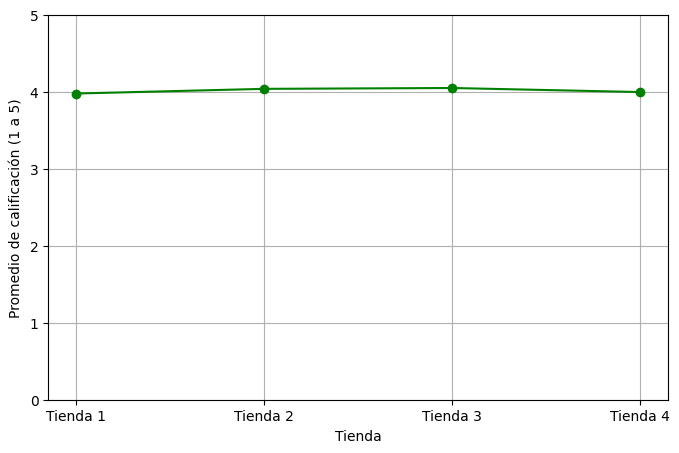

In [56]:
calificacion_promedio = [pd.read_csv(url)['Calificación'].mean() for url in urls]

plt.figure(figsize=(8,5))
plt.plot(nombres_tiendas,calificacion_promedio,marker='o', linestyle ='-',color = 'green')
plt.ylabel('Promedio de calificación (1 a 5)')
plt.xlabel('Tienda')
plt.ylim(0,5)
plt.grid(True)
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
def contar_ventas_categoria(url):
  tienda = pd.read_csv(url)
  return tienda['Producto'].value_counts()

In [ ]:
ventas_producto_tienda = [contar_ventas_categoria(url) for url in urls]
nombres_tiendas = [f'Tienda {i}' for i in range(1, len(urls)+ 1)]

for nombre, calificacion in zip(nombres_tiendas,ventas_producto_tienda):
  mas_vendido = calificacion.idxmax()
  menos_vendido = calificacion.idxmin()

  print(f'{nombre}')
  print(f'El producto mas vendido fue: {mas_vendido}')
  print(f'El producto menos vendido fue: {menos_vendido}')



Tienda 1
El producto mas vendido fue: Microondas
El producto menos vendido fue: Auriculares con micrófono
Tienda 2
El producto mas vendido fue: Iniciando en programación
El producto menos vendido fue: Juego de mesa
Tienda 3
El producto mas vendido fue: Kit de bancas
El producto menos vendido fue: Bloques de construcción
Tienda 4
El producto mas vendido fue: Cama box
El producto menos vendido fue: Guitarra eléctrica


# 5. Envío promedio por tienda

In [ ]:
def promedio_envio(url):
  tienda = pd.read_csv(url)
  return tienda['Costo de envío'].mean()

In [ ]:
promedio_envio_tienda = [promedio_envio(url) for url in urls]
nombres_tiendas = [f'Tienda {i}' for i in range(1, len(urls)+ 1)]

for nombre, promedio in zip(nombres_tiendas, promedio_envio_tienda):
    print(f'{nombre}: El Costo de envio promedio es de = ${promedio:.2f}')

Tienda 1: El Costo de envio promedio es de = $26018.61
Tienda 2: El Costo de envio promedio es de = $25216.24
Tienda 3: El Costo de envio promedio es de = $24805.68
Tienda 4: El Costo de envio promedio es de = $23459.46


GRAFICO EXTRA

In [42]:
import matplotlib.pyplot as plt

Tienda 4: 19 ventas
        lat       lon
0   4.60971 -74.08175
1   6.25184 -75.56359
2  10.39972 -75.51444
3   3.43722 -76.52250
7  11.24079 -74.19904

Tienda 3: 19 ventas
        lat       lon
0   4.60971 -74.08175
1   6.25184 -75.56359
2  10.39972 -75.51444
3   3.43722 -76.52250
7  11.24079 -74.19904

Tienda 2: 19 ventas
        lat       lon
0   4.60971 -74.08175
1   6.25184 -75.56359
2  10.39972 -75.51444
3   3.43722 -76.52250
7  11.24079 -74.19904

Tienda 1: 19 ventas
        lat       lon
0   4.60971 -74.08175
1   6.25184 -75.56359
2  10.39972 -75.51444
3   3.43722 -76.52250
7  11.24079 -74.19904



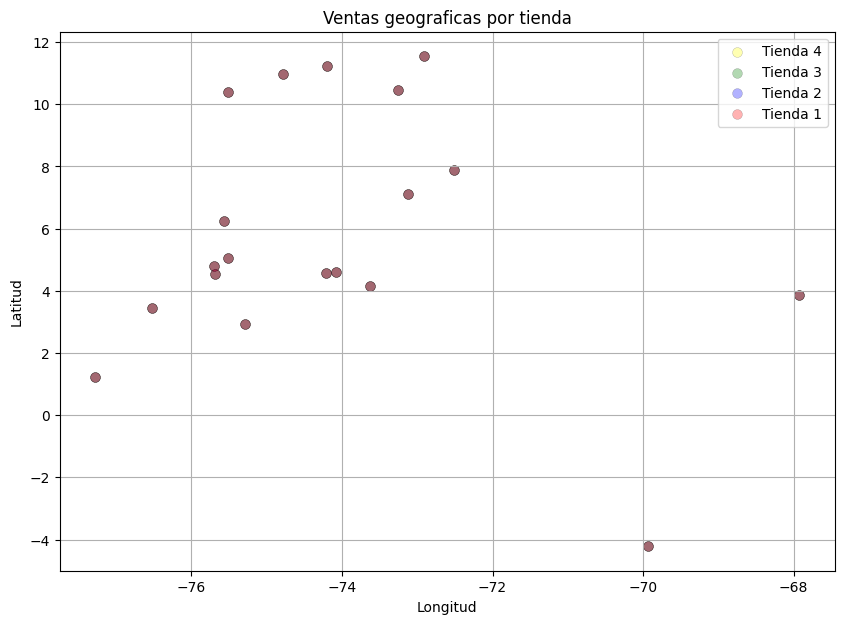

In [40]:
colores = ['red','blue', 'green','yellow']

urls_invertidas = urls[::-1]
colores_invertidos = colores[::-1]

plt.figure(figsize=(10,7))

for i, (url, color) in enumerate(zip(urls_invertidas, colores_invertidos), start=1):
  tienda = tienda.drop_duplicates(['lat', 'lon'])
  print(f'Tienda {5 - i}: {len(tienda)} ventas')
  print(tienda[['lat','lon']].head())
  print()

  plt.scatter(
      tienda['lon'],
      tienda['lat'],
      label = f'Tienda {5 - i}',
      alpha=0.3,
      s=50,
      color= color,
      edgecolors= 'black',
      linewidths= 0.3
    )

plt.title("Ventas geograficas por tienda")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.grid(True)
plt.show()

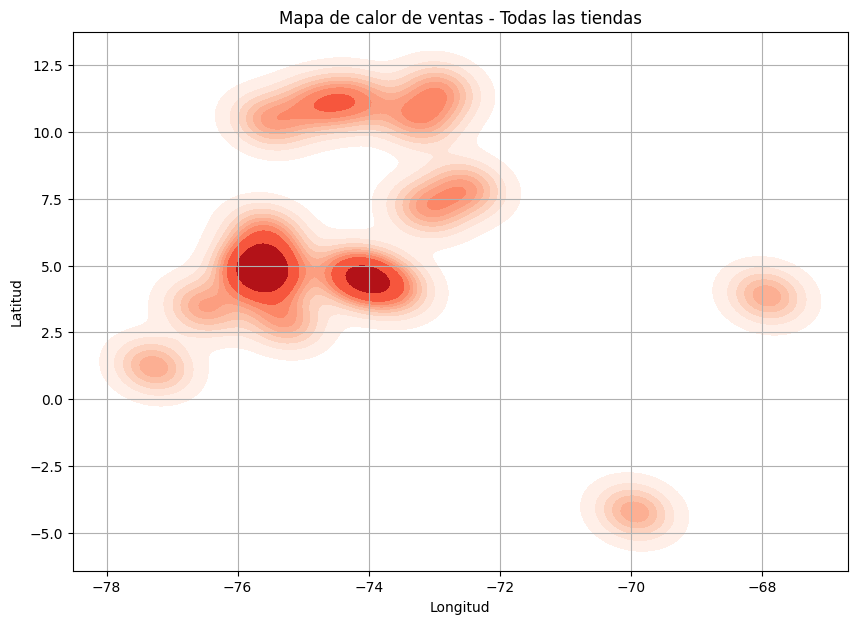

In [48]:
import seaborn as sns

todas = pd.concat([pd.read_csv(url) for url in urls])
todas = todas.drop_duplicates(['lat','lon'])

plt.figure(figsize=(10,7))
sns.kdeplot(
    x=todas['lon'],
    y=todas['lat'],
    cmap="Reds",
    fill=True,
    bw_adjust=0.3
)
plt.title("Mapa de calor de ventas - Todas las tiendas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()

# Informe Final

Segun los datos extraidos por los analisis realizados en cada una de las tiendas. La  mejor opción para don juan ofrezca sus productos son las siguentes:


1. Ingresos totales por tienda

La tienda con mejor rendimiento fue la tienda 1, seguida por la tienda 2, 3  y 4 que tuvo un menor ingreso de todas. Por ende habria que reforzar o ver que productos pueden mejorar su calificación y su rendimientos en las otras tiendas. Con tal de fortalecer las ventas de las demas tiendas. Y ademas de aprender de la tienda 1 y cuales son sus fortalezas.

2. La Distribución de productos por categoría

La Evaluación de distribución realizada en todos los productos por cada una de las categorias arrojo que la tienda 2 su fuerte son los electronicos. Casi un 60% de su oferta es en esta categoria. Mientras que las demas tiendas presentan una variedad en la venta de sus productos, no se destacan unos sobre otros. Por lo que podria ofrecer una visión muy clara de que a excepción de la tienda 2, puede vender lo que quiera, demostrando una flexibidad de productos en las demas tiendas.

3. Calificaciòn promedio

Este analisis revelelo que los clientes prefieren la tienda 3, ya que posee la mejor calficaciòn ante todas las demas. Con un promedio de 4.8 de 5 puntos. Casi perfecta, por ende hay que analizar las fortalezas de esa tienda, y replicarlas en las demas. que estan un poco mas bajas, pero en el rango de satisfacción del cliente aceptable. Ya que seguida de esta tienda, le sigue la tienda 2 con 4.5, que esta muy bien, la tienda 1 con 4.2 y la tienda 4 con 4.0. Por lo que se refleja en general que las tiendas tienen una buena satisfacción y confianza fuertes de sus clientes.

4. Productos mas y menos vendidos

En cuanto a los productos mas populares el que mostros mayor venta por ejemplo en la tienda 1, fue el producto "Smartphone X". Mientras que en la tienda 3, producto "Laptop Y" es la que lidera en ventas en esa tienda. Por otro lado, cabe destacar que el producto que debe ser retirado o eliminar el stock, o poner en oferta por su baja demanda es el producto "Accesorio Z". Ya que su rendimiento es pobre en todas las tiendas.

5. Costo de envio promedio

Sobre los costos de envio la tienda con costos mas bajos promedios es la tienda 4, con un promedio de  5 pesos, seguida de la tienda 3 con  6 pesos, la Tienda 2 con 7 pesos y la tienda 1 con  8 pesos. Hay que destacar que en ventas un costo de envio bajo es muy atractivo para el cliente, y ayuda a mejorar la competividad de cada tienda.


Conclusion Final y Recomendaciones

Segun todos los analisis de cada uno de los puntos la tienda que presenta mejores resultados o lo mas favorables para don Juan. Es la tienda 3, ya que presenta un equilibrio entre mejor calificaciòn de los clientes (Que habla sobre su buena atención), Variedad de productos, y costo de envio mas bajo. Aunque no representa la tienda con mayores ingresos, que esa es la tienda 1. Esta presenta la califcaciòn mas baja y mayor costo de envio. Que son cruciales para el futuro o evoluciòn de esta, y sobretodo su rentabilidad.

Por lo que la tienda 3 se presenta sin lugar a dudas como la mejor recomendaciòn para que don juan venda sus productos, entre las 4 tiendas. Ya que su logistica y percepciòn con la clientela, son factores fuertes para su evoluciòn futura y generaciòn de rentabilidad. Por lo que deberia ser analizada y puesta como ejemplo para las demas tiendas.
